<a href="https://colab.research.google.com/github/akshar99/machine-learning-articles/blob/master/Major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings 
warnings.filterwarnings("ignore")


World Data is represnted by w_d

In [2]:
# world data will be abbrivated as w_d
w_d = pd.read_csv('/content/drive/My Drive/python/covid-dataset-06-10-20.csv')


In [3]:
w_d.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [4]:
w_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48169 entries, 0 to 48168
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         47889 non-null  object 
 1   continent                        47609 non-null  object 
 2   location                         48169 non-null  object 
 3   date                             48169 non-null  object 
 4   total_cases                      47555 non-null  float64
 5   new_cases                        47339 non-null  float64
 6   new_cases_smoothed               46557 non-null  float64
 7   total_deaths                     47555 non-null  float64
 8   new_deaths                       47339 non-null  float64
 9   new_deaths_smoothed              46557 non-null  float64
 10  total_cases_per_million          47275 non-null  float64
 11  new_cases_per_million            47275 non-null  float64
 12  new_cases_smoothed

Removing the unnecassary Data Columns

In [5]:
w_d = w_d.drop(['continent','female_smokers','male_smokers','handwashing_facilities','new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million','new_tests_smoothed','new_tests_smoothed_per_thousand', 'stringency_index','population','population_density' , 'median_age','aged_65_older','aged_70_older' , 'extreme_poverty','cardiovasc_death_rate','diabetes_prevalence', 'hospital_beds_per_thousand','life_expectancy','human_development_index'] , axis=1)
#w_d = w_d.drop(w_d.columns[[1,6,9,12,15,20,21,25,26,27,28,29,30,33,34]], axis=1 , inplace=True)

In [6]:
print('w_d shape:{}'.format(w_d.shape))
print(w_d.info())

w_d shape:(48169, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48169 entries, 0 to 48168
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  47889 non-null  object 
 1   location                  48169 non-null  object 
 2   date                      48169 non-null  object 
 3   total_cases               47555 non-null  float64
 4   new_cases                 47339 non-null  float64
 5   total_deaths              47555 non-null  float64
 6   new_deaths                47339 non-null  float64
 7   total_cases_per_million   47275 non-null  float64
 8   new_cases_per_million     47275 non-null  float64
 9   total_deaths_per_million  47275 non-null  float64
 10  new_deaths_per_million    47275 non-null  float64
 11  new_tests                 17266 non-null  float64
 12  total_tests               17685 non-null  float64
 13  total_tests_per_thousand  17685 non-nul

In [7]:
w_d.head()


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case,positive_rate,tests_units,gdp_per_capita
0,ABW,Aruba,2020-03-13,2.0,2.0,0.0,0.0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35973.781
1,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35973.781
2,ABW,Aruba,2020-03-20,4.0,2.0,0.0,0.0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35973.781
3,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35973.781
4,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35973.781


In [8]:
w_d['date'] = pd.to_datetime(w_d['date'] , format='%Y-%m-%d')

In [9]:
w_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48169 entries, 0 to 48168
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  47889 non-null  object        
 1   location                  48169 non-null  object        
 2   date                      48169 non-null  datetime64[ns]
 3   total_cases               47555 non-null  float64       
 4   new_cases                 47339 non-null  float64       
 5   total_deaths              47555 non-null  float64       
 6   new_deaths                47339 non-null  float64       
 7   total_cases_per_million   47275 non-null  float64       
 8   new_cases_per_million     47275 non-null  float64       
 9   total_deaths_per_million  47275 non-null  float64       
 10  new_deaths_per_million    47275 non-null  float64       
 11  new_tests                 17266 non-null  float64       
 12  total_tests       

In [10]:
w_d.isnull().sum()

iso_code                      280
location                        0
date                            0
total_cases                   614
new_cases                     830
total_deaths                  614
new_deaths                    830
total_cases_per_million       894
new_cases_per_million         894
total_deaths_per_million      894
new_deaths_per_million        894
new_tests                   30903
total_tests                 30484
total_tests_per_thousand    30484
new_tests_per_thousand      30903
tests_per_case              30226
positive_rate               29787
tests_units                 27835
gdp_per_capita               5791
dtype: int64

In [11]:
w_d['date'].nunique()

280

In [12]:
print('first date {} '.format(w_d['date'].min()))
print('last date {} '.format(w_d['date'].max()))

first date 2019-12-31 00:00:00 
last date 2020-10-05 00:00:00 


In [13]:
w_d['iso_code'].unique()

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH',
       'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY',
       'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL',
       'GTM', 'GUM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN',
       'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM',
       'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR',
       'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO',
       'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX',
       'MKD', 'MLI',

Selecting The Rows that are represents the whole world data by the iso code 

In [14]:
world_data = w_d[w_d['iso_code'] == 'OWID_WRL']

In [15]:
print('world data shape: {}'.format(world_data.shape))

world data shape: (280, 19)


In [16]:
world_data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case,positive_rate,tests_units,gdp_per_capita
47609,OWID_WRL,World,2019-12-31,27.0,27.0,0.0,0.0,0.003,0.003,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15469.207
47610,OWID_WRL,World,2020-01-01,27.0,0.0,0.0,0.0,0.003,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15469.207
47611,OWID_WRL,World,2020-01-02,27.0,0.0,0.0,0.0,0.003,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15469.207
47612,OWID_WRL,World,2020-01-03,44.0,17.0,0.0,0.0,0.006,0.002,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15469.207
47613,OWID_WRL,World,2020-01-04,44.0,0.0,0.0,0.0,0.006,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15469.207


In [17]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 47609 to 47888
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  280 non-null    object        
 1   location                  280 non-null    object        
 2   date                      280 non-null    datetime64[ns]
 3   total_cases               280 non-null    float64       
 4   new_cases                 280 non-null    float64       
 5   total_deaths              280 non-null    float64       
 6   new_deaths                280 non-null    float64       
 7   total_cases_per_million   280 non-null    float64       
 8   new_cases_per_million     280 non-null    float64       
 9   total_deaths_per_million  280 non-null    float64       
 10  new_deaths_per_million    280 non-null    float64       
 11  new_tests                 0 non-null      float64       
 12  total_tests     

In [18]:
world_data.isnull().sum()

iso_code                      0
location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_cases_per_million       0
new_cases_per_million         0
total_deaths_per_million      0
new_deaths_per_million        0
new_tests                   280
total_tests                 280
total_tests_per_thousand    280
new_tests_per_thousand      280
tests_per_case              280
positive_rate               280
tests_units                 280
gdp_per_capita                0
dtype: int64

Dropping Null Values

In [19]:
world_data = world_data.dropna(axis ='columns')

In [20]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 47609 to 47888
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  280 non-null    object        
 1   location                  280 non-null    object        
 2   date                      280 non-null    datetime64[ns]
 3   total_cases               280 non-null    float64       
 4   new_cases                 280 non-null    float64       
 5   total_deaths              280 non-null    float64       
 6   new_deaths                280 non-null    float64       
 7   total_cases_per_million   280 non-null    float64       
 8   new_cases_per_million     280 non-null    float64       
 9   total_deaths_per_million  280 non-null    float64       
 10  new_deaths_per_million    280 non-null    float64       
 11  gdp_per_capita            280 non-null    float64       
dtypes: datetime64[ns

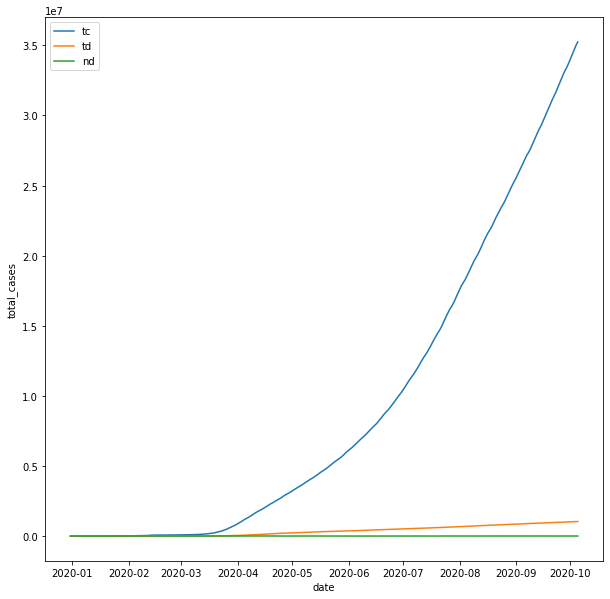

In [21]:
fig_dims = (10,10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.lineplot(x='date', y='total_cases', ax=ax , data = world_data, label='tc')
sns.lineplot(x='date' , y= 'total_deaths' , ax=ax , data = world_data, label='td')
sns.lineplot(x='date' , y= 'new_deaths' , ax=ax , data = world_data, label='nd')
plt.legend()
plt.show()

Visualising new cases

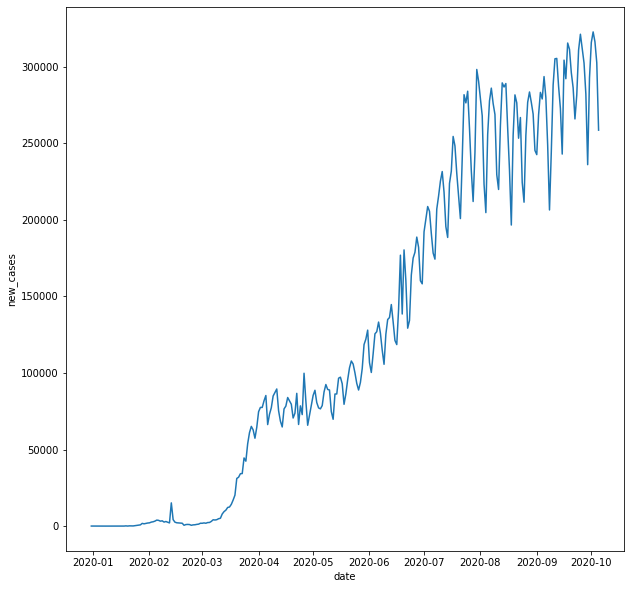

In [22]:
fig_dims = (10,10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.lineplot(x='date' , y='new_cases', ax=ax ,data = world_data)
plt.show()

In [23]:
#sns.lineplot(x='total_deaths' , y='new_cases', ax=ax ,data = world_data)

Making another dataset for Forecasting with fbProphet()

In [24]:
world_data_forecast = world_data.groupby('date').agg(Total_Death = ('total_deaths', sum), date = ('date',max))

In [25]:
world_data_forecast = world_data_forecast.rename(columns={'Total_Death':'y','date':'ds'})
world_data_forecast

,y,ds
date,,
2019-12-31,0.0,2019-12-31
2020-01-01,0.0,2020-01-01
2020-01-02,0.0,2020-01-02
2020-01-03,0.0,2020-01-03
2020-01-04,0.0,2020-01-04
...,...,...
2020-10-01,1015235.0,2020-10-01
2020-10-02,1024006.0,2020-10-02
2020-10-03,1029538.0,2020-10-03


In [26]:
import fbprophet
op = fbprophet.Prophet()
op.fit(world_data_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
forecast = op.make_future_dataframe(30,'D')
forecast = op.predict(forecast)


Forecasting Deaths

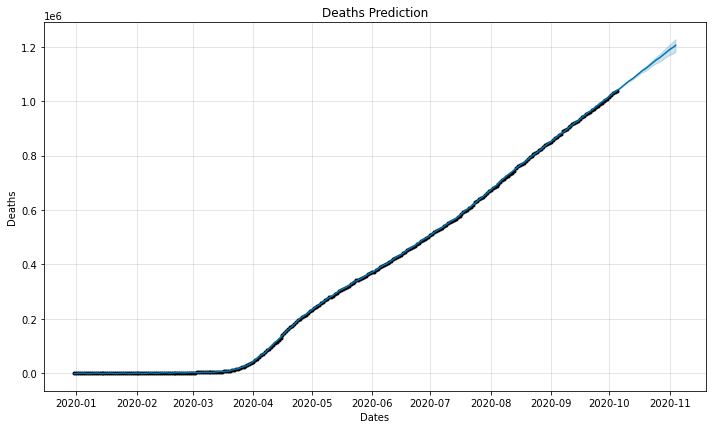

In [28]:
op.plot(forecast, xlabel='Dates', ylabel='Deaths')
plt.title('Deaths Prediction');

In [29]:
world_case_forecast = world_data.groupby('date').agg(Total_cases = ('total_cases' , sum), date = ('date' , max))
world_case_forecast

,Total_cases,date
date,,
2019-12-31,27.0,2019-12-31
2020-01-01,27.0,2020-01-01
2020-01-02,27.0,2020-01-02
2020-01-03,44.0,2020-01-03
2020-01-04,44.0,2020-01-04
...,...,...
2020-10-01,34047256.0,2020-10-01
2020-10-02,34369883.0,2020-10-02
2020-10-03,34686054.0,2020-10-03


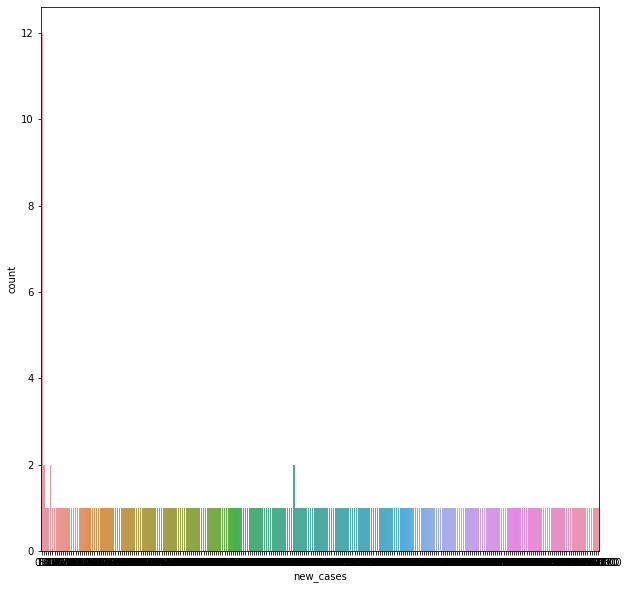

In [30]:
figdims = (20,10)
fig ,ax = plt.subplots(figsize = fig_dims)
sns.countplot(world_data['new_cases'], ax=ax)

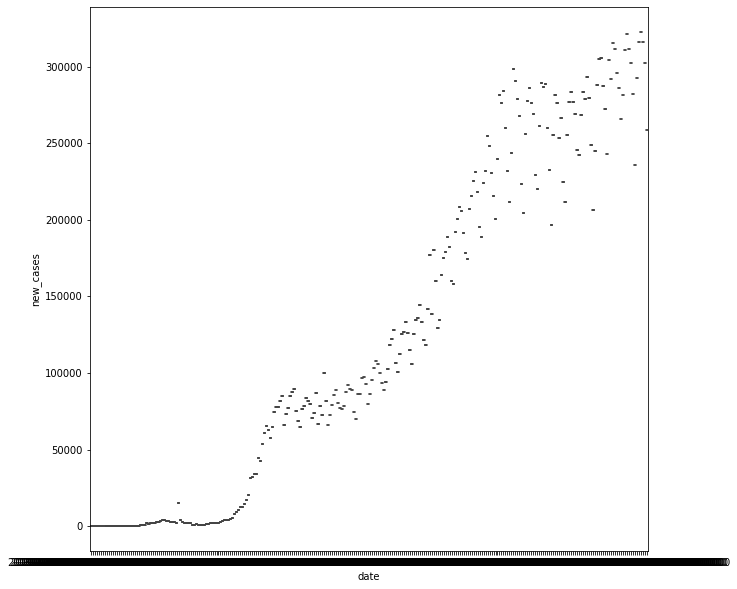

In [31]:
figdims = (20,30)
fig ,ax = plt.subplots(figsize = fig_dims)
sns.boxplot(x = 'date' , y = 'new_cases',data = world_data, ax=ax)

Creating Data for a country[France] by using the iso_code

In [32]:
france_data = w_d[w_d['iso_code'] == 'FRA']

In [33]:
france_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 15171 to 15450
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  280 non-null    object        
 1   location                  280 non-null    object        
 2   date                      280 non-null    datetime64[ns]
 3   total_cases               280 non-null    float64       
 4   new_cases                 280 non-null    float64       
 5   total_deaths              280 non-null    float64       
 6   new_deaths                280 non-null    float64       
 7   total_cases_per_million   280 non-null    float64       
 8   new_cases_per_million     280 non-null    float64       
 9   total_deaths_per_million  280 non-null    float64       
 10  new_deaths_per_million    280 non-null    float64       
 11  new_tests                 142 non-null    float64       
 12  total_tests     

In [34]:
france_data.shape

(280, 19)

In [35]:
france_data.isnull().sum()

iso_code                      0
location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_cases_per_million       0
new_cases_per_million         0
total_deaths_per_million      0
new_deaths_per_million        0
new_tests                   138
total_tests                 280
total_tests_per_thousand    280
new_tests_per_thousand      138
tests_per_case              144
positive_rate               144
tests_units                 138
gdp_per_capita                0
dtype: int64

Dropping Null Values in France

In [36]:
france_data = france_data.dropna(axis='columns')

In [37]:
france_data.isnull().sum()

iso_code                    0
location                    0
date                        0
total_cases                 0
new_cases                   0
total_deaths                0
new_deaths                  0
total_cases_per_million     0
new_cases_per_million       0
total_deaths_per_million    0
new_deaths_per_million      0
gdp_per_capita              0
dtype: int64

In [38]:
france_data.shape

(280, 12)

In [39]:
france_data['date'].nunique()

280

Text(0.5, 1.0, 'Total Cases Visualisation')

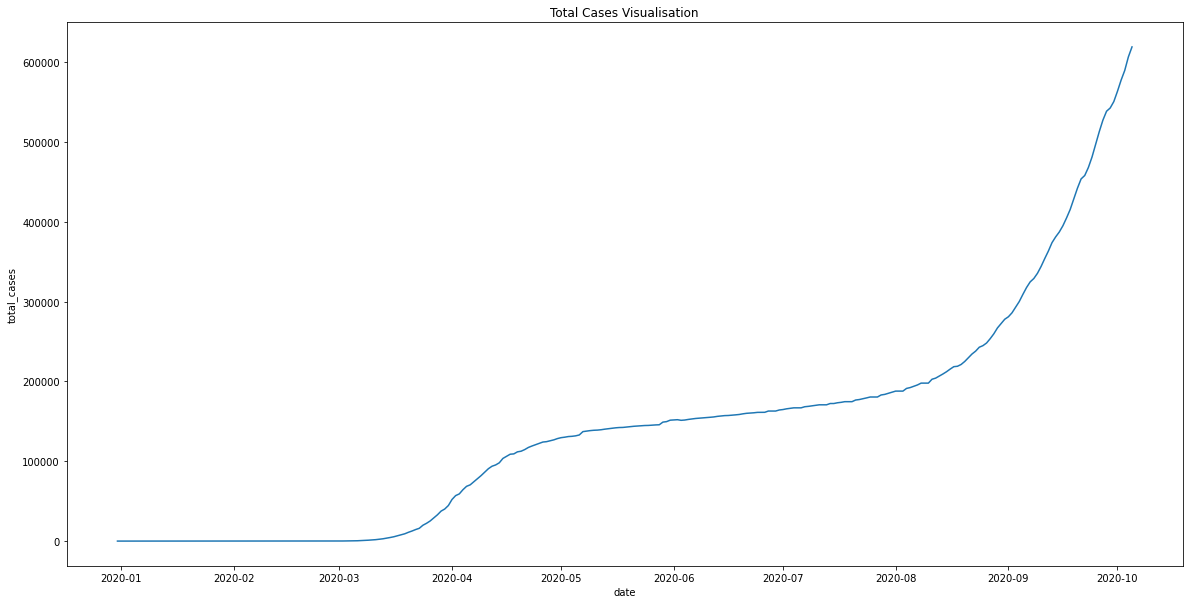

In [40]:
fig_dims = (20,10)
fig ,ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x='date' , y='total_cases', data = france_data , ax=ax)
plt.title('Total Cases Visualisation')

In [41]:
france_data['date'].min()

Timestamp('2019-12-31 00:00:00')

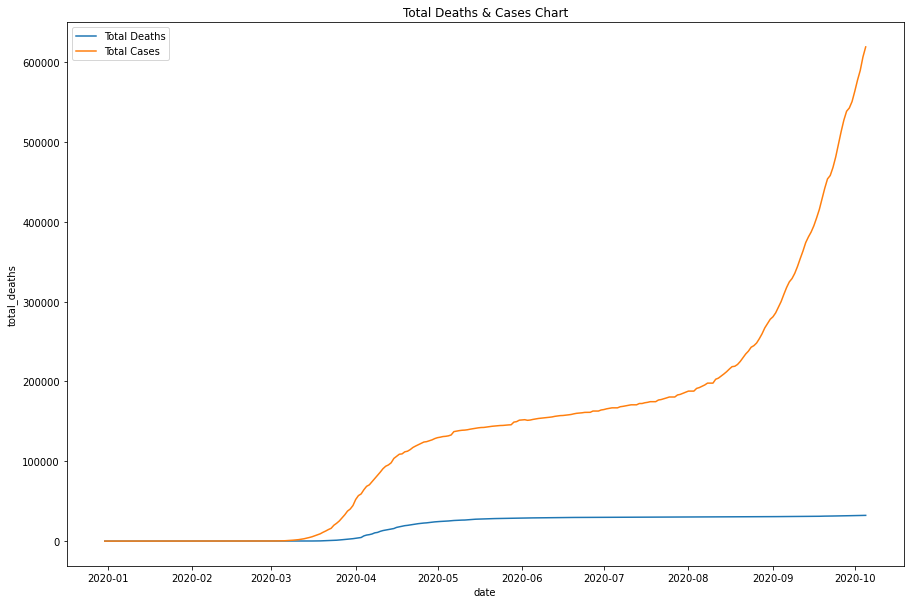

In [42]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date' , y='total_deaths' ,label='Total Deaths', ax=ax , data = france_data)
sns.lineplot(x='date' , y='total_cases' ,label='Total Cases', ax=ax ,data =france_data )
plt.title('Total Deaths & Cases Chart')
plt.legend()
plt.show()

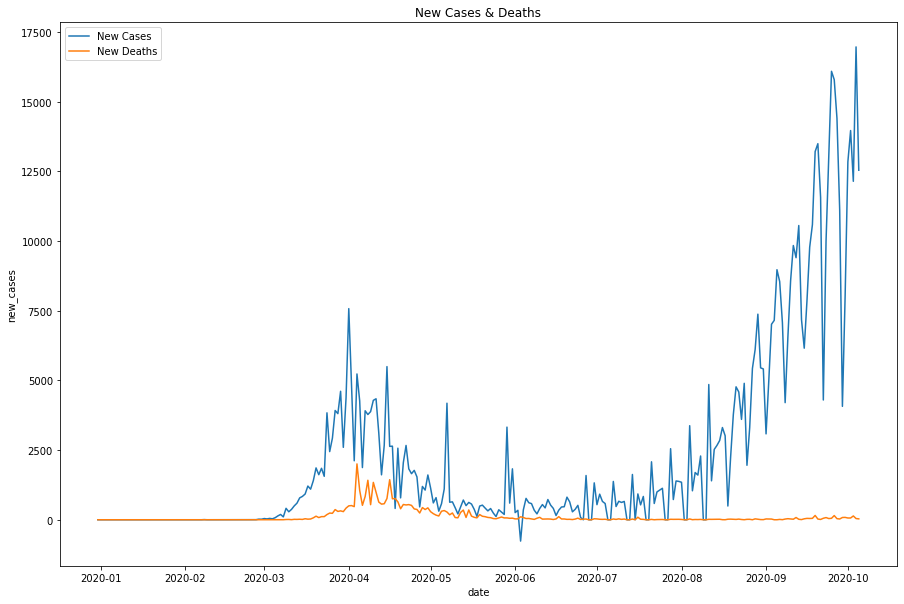

In [43]:
figdims = (15,10)
fig , ax =  plt.subplots(figsize=figdims)
sns.lineplot(x='date' ,y='new_cases' , label='New Cases' , ax=ax , data=france_data)
sns.lineplot(x='date' , y='new_deaths' , label= 'New Deaths', ax=ax , data = france_data)
plt.legend()
plt.title('New Cases & Deaths')
plt.show()

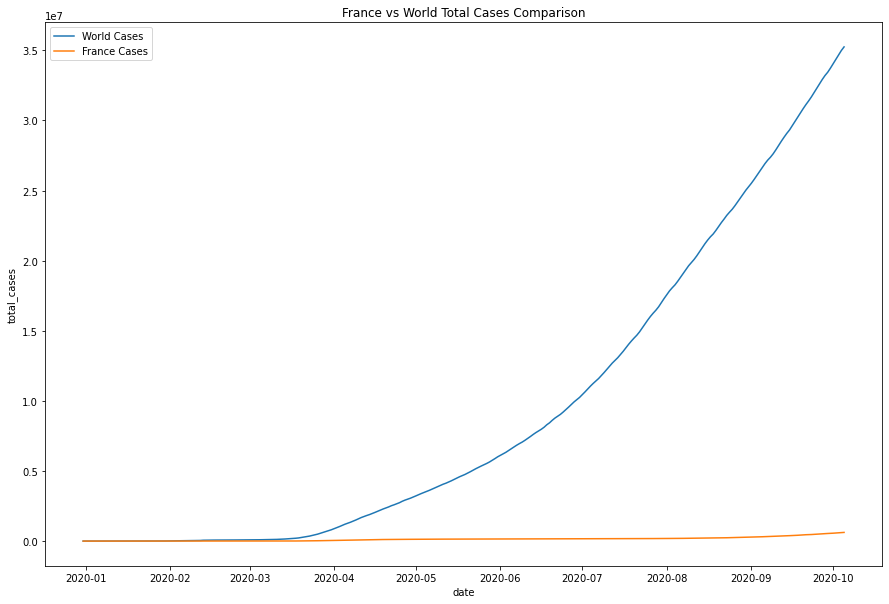

In [44]:
figdims =(15,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date' , y='total_cases' , ax=ax , data=world_data , label='World Cases')
sns.lineplot(x='date' , y='total_cases' , ax=ax, data= france_data ,label = 'France Cases')
plt.legend()
plt.title('France vs World Total Cases Comparison')
plt.show()

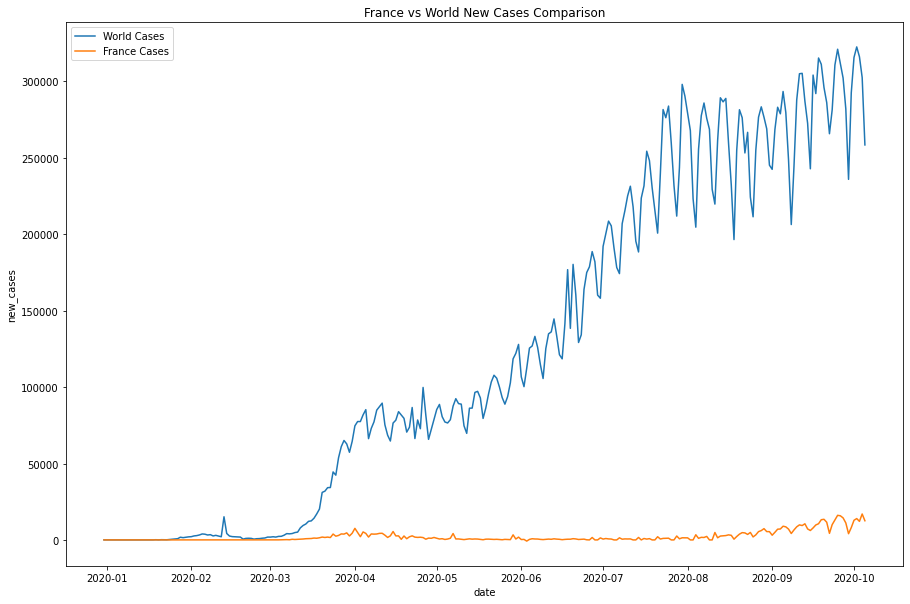

In [45]:
figdims =(15,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date' , y='new_cases' , ax=ax , data=world_data , label='World Cases')
sns.lineplot(x='date' , y='new_cases' , ax=ax, data= france_data ,label = 'France Cases')
plt.legend()
plt.title('France vs World New Cases Comparison')
plt.show()

In [46]:
italy_data = w_d[w_d['iso_code'] == 'ITA']

In [47]:
italy_data.shape

(280, 19)

In [48]:
italy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 22214 to 22493
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  280 non-null    object        
 1   location                  280 non-null    object        
 2   date                      280 non-null    datetime64[ns]
 3   total_cases               280 non-null    float64       
 4   new_cases                 280 non-null    float64       
 5   total_deaths              280 non-null    float64       
 6   new_deaths                280 non-null    float64       
 7   total_cases_per_million   280 non-null    float64       
 8   new_cases_per_million     280 non-null    float64       
 9   total_deaths_per_million  280 non-null    float64       
 10  new_deaths_per_million    280 non-null    float64       
 11  new_tests                 168 non-null    float64       
 12  total_tests     

In [49]:
 italy_data = italy_data.dropna('columns')

In [50]:
italy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 22214 to 22493
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  280 non-null    object        
 1   location                  280 non-null    object        
 2   date                      280 non-null    datetime64[ns]
 3   total_cases               280 non-null    float64       
 4   new_cases                 280 non-null    float64       
 5   total_deaths              280 non-null    float64       
 6   new_deaths                280 non-null    float64       
 7   total_cases_per_million   280 non-null    float64       
 8   new_cases_per_million     280 non-null    float64       
 9   total_deaths_per_million  280 non-null    float64       
 10  new_deaths_per_million    280 non-null    float64       
 11  gdp_per_capita            280 non-null    float64       
dtypes: datetime64[ns

Creating a new Variable of Country Italy

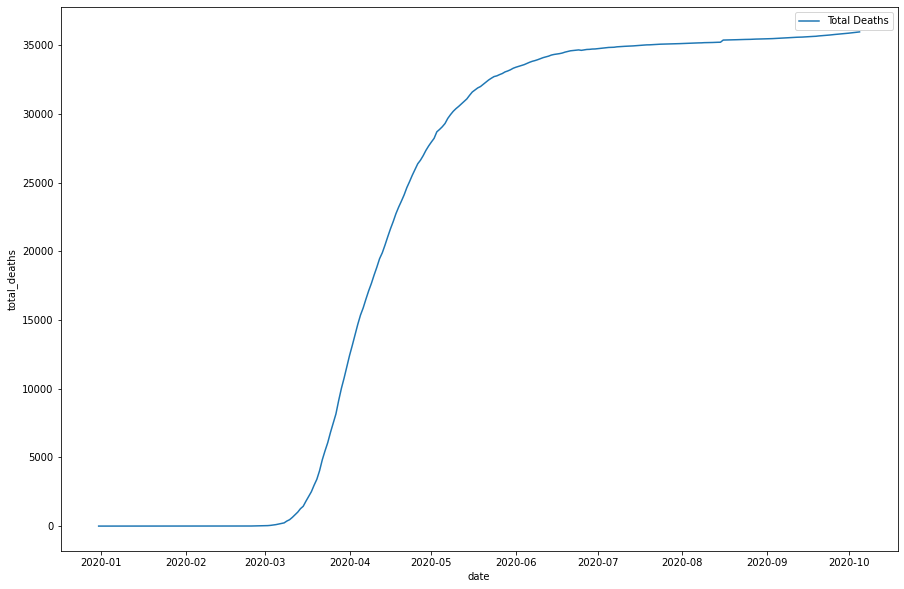

In [51]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date', y='total_deaths', data=italy_data, ax=ax , label='Total Deaths')
plt.show()

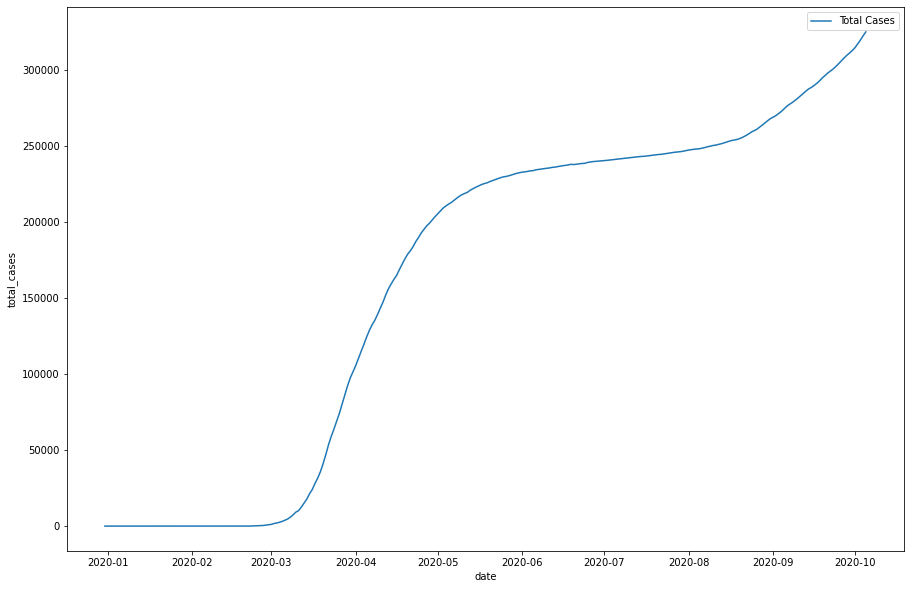

In [52]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date', y='total_cases', data=italy_data, ax=ax , label='Total Cases')
plt.show()

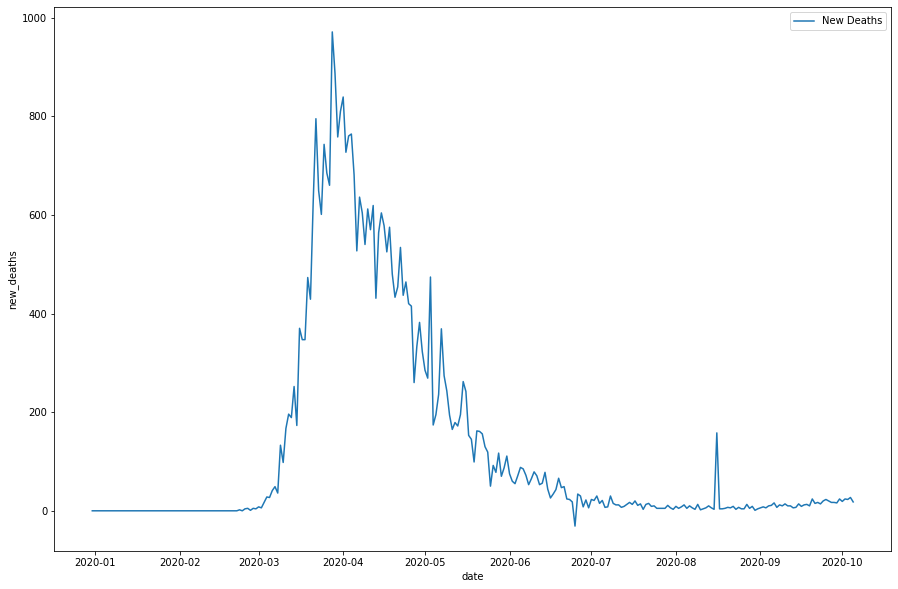

In [53]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date', y='new_deaths', data=italy_data, ax=ax , label='New Deaths')
plt.show()

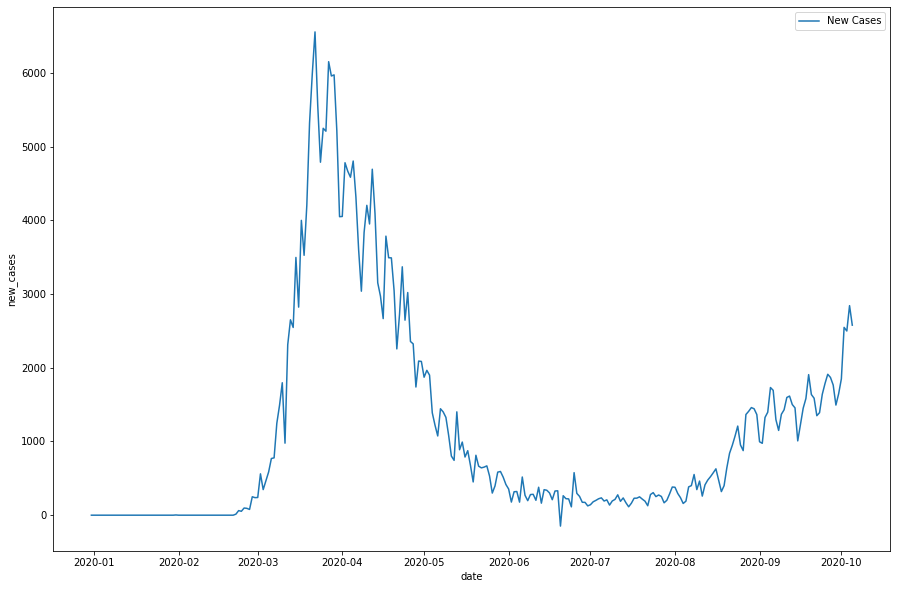

In [54]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date', y='new_cases', data=italy_data, ax=ax , label='New Cases')
plt.show()

Visualisation of Two Different Coungtry at a Single Graph

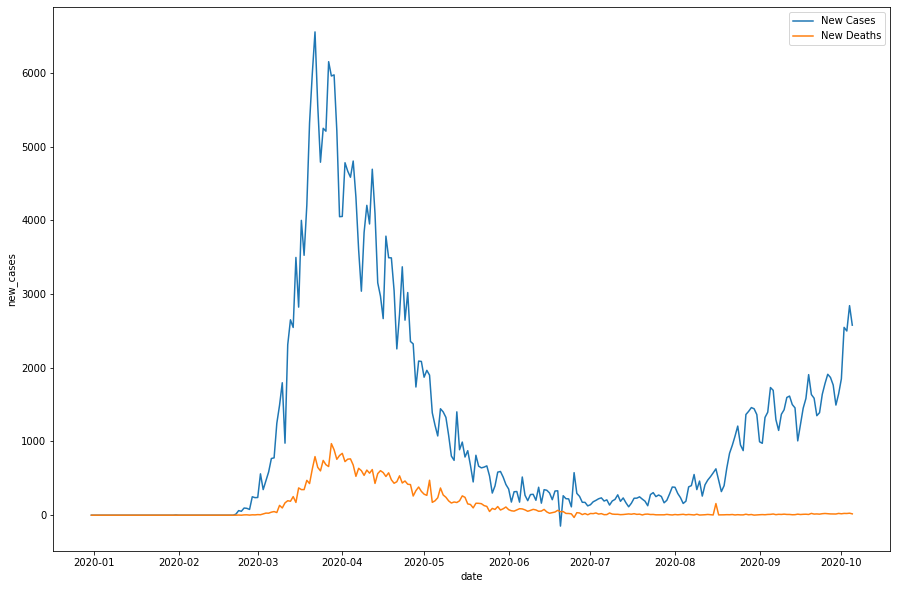

In [55]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date', y='new_cases', data=italy_data, ax=ax , label='New Cases')
sns.lineplot(x='date' , y='new_deaths', data = italy_data, ax=ax , label='New Deaths')
plt.legend()
plt.show()


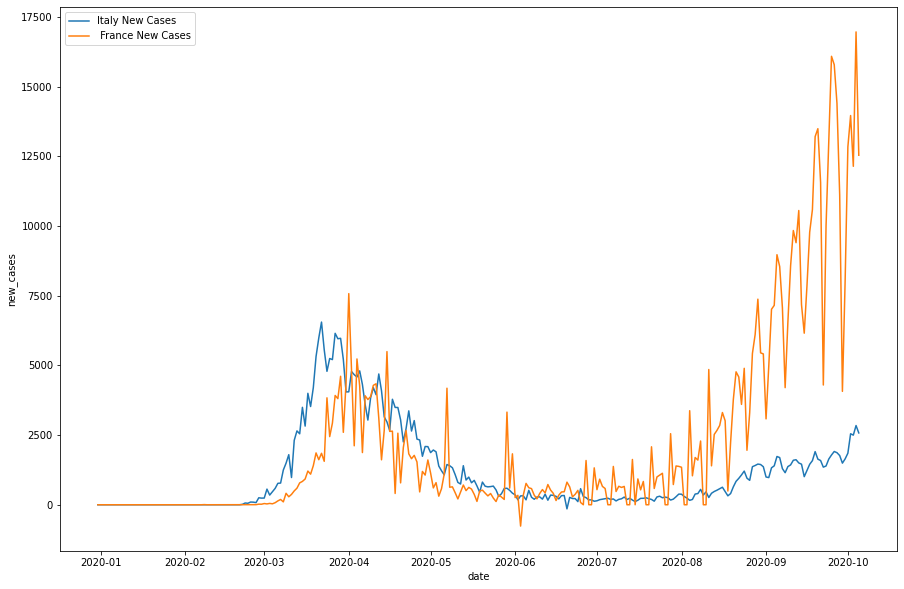

In [56]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date', y='new_cases', data=italy_data, ax=ax , label='Italy New Cases')
sns.lineplot(x='date' , y='new_cases', data = france_data, ax=ax , label=' France New Cases')
plt.legend()
plt.show()


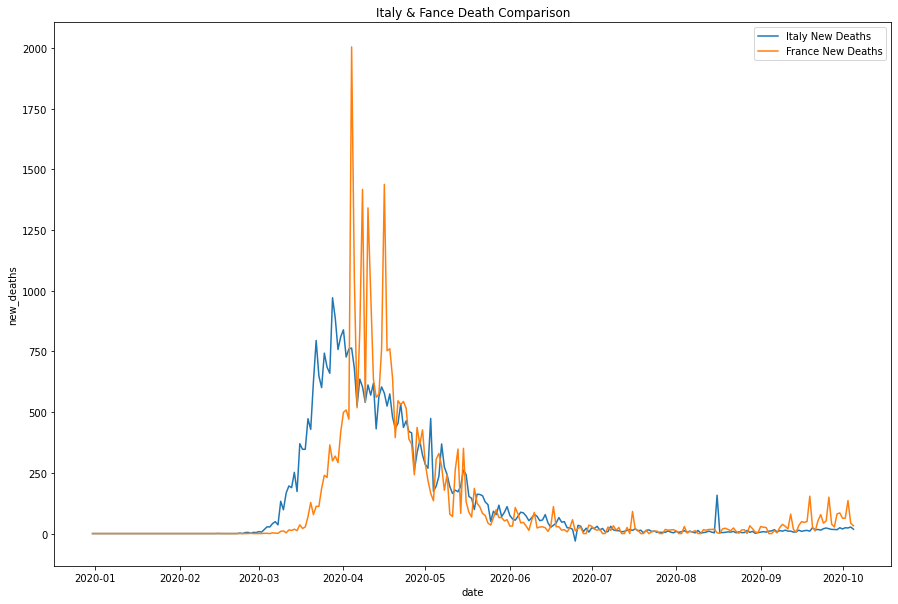

In [57]:
figdims = (15,10)
fig , ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date', y='new_deaths',data=italy_data , label = 'Italy New Deaths', ax=ax )
sns.lineplot(x='date', y='new_deaths',data=france_data , label = 'France New Deaths', ax=ax )
plt.legend()
plt.title('Italy & Fance Death Comparison')
plt.show()

In [58]:
france_forecast = france_data.groupby('date').agg(new_cases = ('new_cases',sum),date = ('date',max))
france_forecast

,new_cases,date
date,,
2019-12-31,0.0,2019-12-31
2020-01-01,0.0,2020-01-01
2020-01-02,0.0,2020-01-02
2020-01-03,0.0,2020-01-03
2020-01-04,0.0,2020-01-04
...,...,...
2020-10-01,12845.0,2020-10-01
2020-10-02,13970.0,2020-10-02
2020-10-03,12148.0,2020-10-03


In [59]:
france_forecast = france_forecast.rename(columns = {'new_cases':'y', 'date':'ds'})
france_forecast

,y,ds
date,,
2019-12-31,0.0,2019-12-31
2020-01-01,0.0,2020-01-01
2020-01-02,0.0,2020-01-02
2020-01-03,0.0,2020-01-03
2020-01-04,0.0,2020-01-04
...,...,...
2020-10-01,12845.0,2020-10-01
2020-10-02,13970.0,2020-10-02
2020-10-03,12148.0,2020-10-03


In [60]:
import fbprophet
fp = fbprophet.Prophet()

In [61]:
fp.fit(france_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
france_forecast_cases = fp.make_future_dataframe(30 ,'D')

In [63]:
france_forecast_cases = fp.predict(france_forecast_cases)

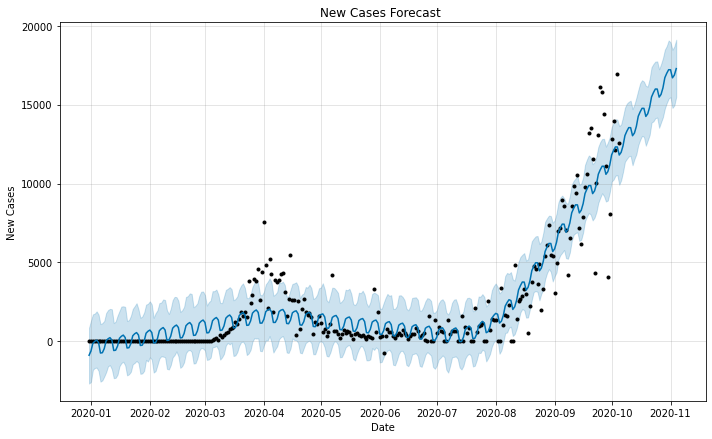

In [64]:
fp.plot(france_forecast_cases , xlabel='Date' , ylabel='New Cases')
plt.title('New Cases Forecast ');

In [65]:
italy_forecast = italy_data.groupby('date').agg(new_cases =('new_cases',sum), date =('date',max))

In [66]:
italy_forecast = italy_forecast.rename(columns ={'new_cases':'y', 'date':'ds'})

In [67]:
ip = fbprophet.Prophet()
ip.fit(italy_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
italy_forecast_cases = ip.make_future_dataframe(30,'D')

In [69]:
italy_forecast_cases = ip.predict(italy_forecast_cases)

Text(0.5, 1.0, 'Italy New Cses Forecast')

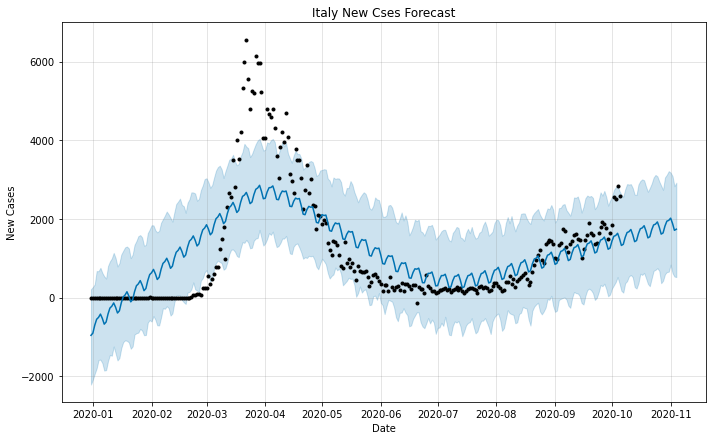

In [70]:
ip.plot(italy_forecast_cases, xlabel='Date' ,ylabel='New Cases' )
plt.title('Italy New Cses Forecast')

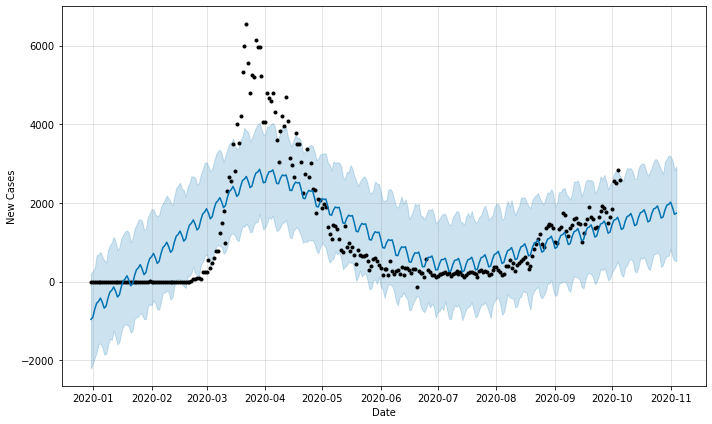

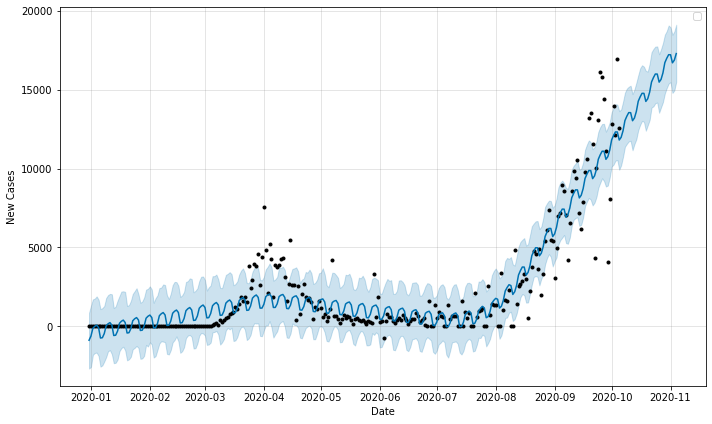

In [71]:
ip.plot(italy_forecast_cases, xlabel='Date' ,ylabel='New Cases' )
fp.plot(france_forecast_cases , xlabel='Date' , ylabel='New Cases')
plt.legend()


Defining  Dataset for INDIA

In [76]:
india_data = w_d[w_d['iso_code']=='IND']

In [77]:
india_data.shape

(280, 19)

In [78]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 20534 to 20813
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  280 non-null    object        
 1   location                  280 non-null    object        
 2   date                      280 non-null    datetime64[ns]
 3   total_cases               279 non-null    float64       
 4   new_cases                 279 non-null    float64       
 5   total_deaths              279 non-null    float64       
 6   new_deaths                279 non-null    float64       
 7   total_cases_per_million   279 non-null    float64       
 8   new_cases_per_million     279 non-null    float64       
 9   total_deaths_per_million  279 non-null    float64       
 10  new_deaths_per_million    279 non-null    float64       
 11  new_tests                 189 non-null    float64       
 12  total_tests     

Dropping Empty or Null Values

In [79]:
india_data = india_data.dropna()

In [80]:
india_data.shape

(188, 19)

In [81]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 20613 to 20812
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  188 non-null    object        
 1   location                  188 non-null    object        
 2   date                      188 non-null    datetime64[ns]
 3   total_cases               188 non-null    float64       
 4   new_cases                 188 non-null    float64       
 5   total_deaths              188 non-null    float64       
 6   new_deaths                188 non-null    float64       
 7   total_cases_per_million   188 non-null    float64       
 8   new_cases_per_million     188 non-null    float64       
 9   total_deaths_per_million  188 non-null    float64       
 10  new_deaths_per_million    188 non-null    float64       
 11  new_tests                 188 non-null    float64       
 12  total_tests     

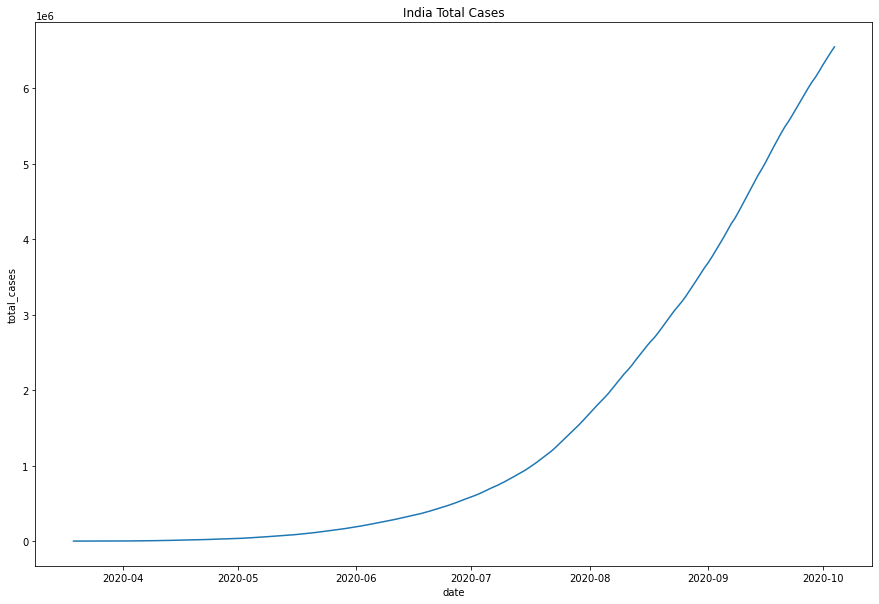

In [85]:
figdims = (15,10)
fig ,ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date' , y='total_cases' , ax=ax , data=india_data)
plt.title('India Total Cases')
plt.show()

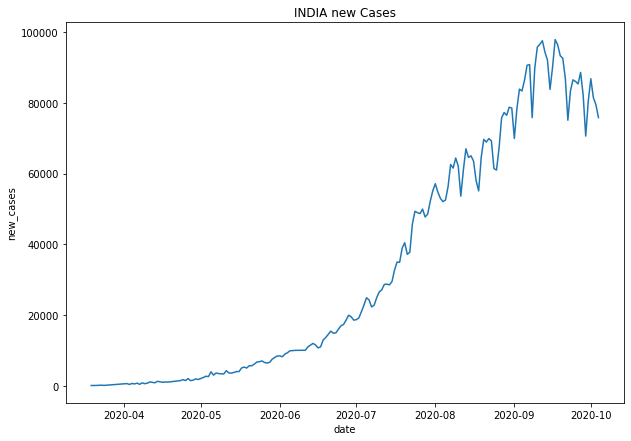

In [87]:
figdims = (10,7)
fig ,ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date' , y='new_cases' , data = india_data , ax=ax)
plt.title('INDIA new Cases')
plt.show()

Here It is observeable that INDIA has touched a peak & now dropping from that peak.

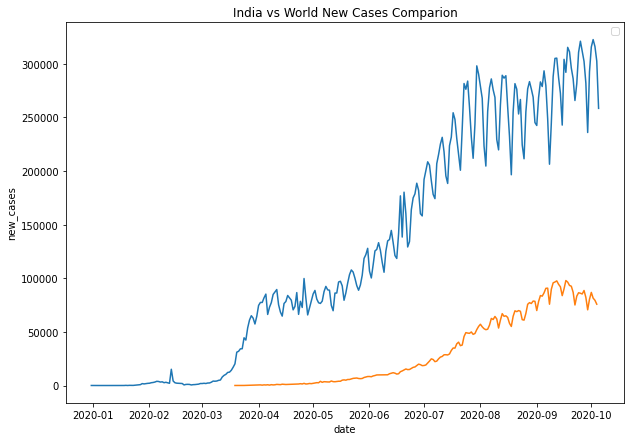

In [89]:
figdims = (10,7)
fig ,ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date' , y='new_cases' , data=world_data, ax=ax)
sns.lineplot(x='date' , y='new_cases' , data = india_data , ax=ax)
plt.title('INDIA new Cases')
plt.title('India vs World New Cases Comparion')
plt.legend()
plt.show()

The World has not yet touched a Peak but India has done .

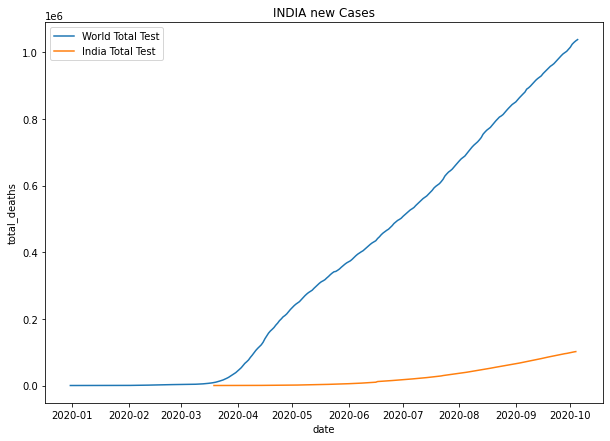

In [106]:
figdims = (10,7)
fig ,ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date' , y='total_deaths' ,label = 'World Total Test', data = world_data , ax=ax)
sns.lineplot(x='date' , y='total_deaths' ,label = 'India Total Test', data = india_data , ax=ax)
plt.title('INDIA new Cases')
plt.legend()
plt.show()

World Graph is Linear but India chart is not acting as a linear graph but as a smoothend exponential graph

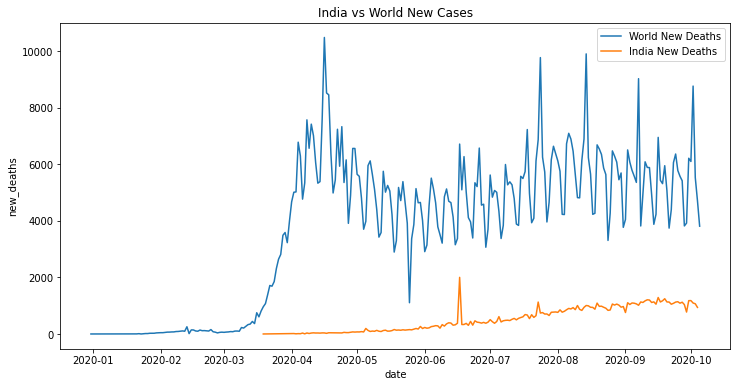

In [103]:
figdims = (12,6)
fig  , ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date' , y='new_deaths' ,label='World New Deaths', data=world_data ,ax=ax)
sns.lineplot(x='date' , y='new_deaths' ,label='India New Deaths', data =india_data , ax=ax)
plt.title('India vs World New Cases')
plt.legend()
plt.show()

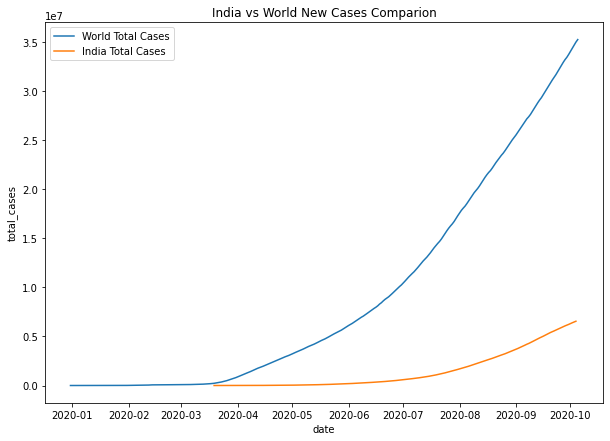

In [99]:
figdims = (10,7)
fig ,ax = plt.subplots(figsize=figdims)
sns.lineplot(x='date' , y='total_cases' ,label='World Total Cases', data=world_data, ax=ax)
sns.lineplot(x='date' , y='total_cases' ,label='India Total Cases', data = india_data , ax=ax)
plt.title('INDIA new Cases')
plt.title('India vs World New Cases Comparion')
plt.legend()
plt.show()

In [108]:
india_forecast = india_data.groupby('date').agg(new_cases=('new_cases',sum) , date = ('date',max))
india_forecast

,new_cases,date
date,,
2020-03-19,28.0,2020-03-19
2020-03-20,26.0,2020-03-20
2020-03-21,40.0,2020-03-21
2020-03-22,89.0,2020-03-22
2020-03-23,119.0,2020-03-23
...,...,...
2020-09-30,80472.0,2020-09-30
2020-10-01,86821.0,2020-10-01
2020-10-02,81484.0,2020-10-02


In [111]:
india_forecast = india_forecast.rename(columns={'new_cases':'y' ,'date':'ds' })

In [113]:
pp= fbprophet.Prophet()

In [115]:
pp.fit(india_forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [116]:
india_forecast_cases = pp.make_future_dataframe(30 ,'D')

In [117]:
india_forecast_cases = pp.predict(india_forecast_cases)

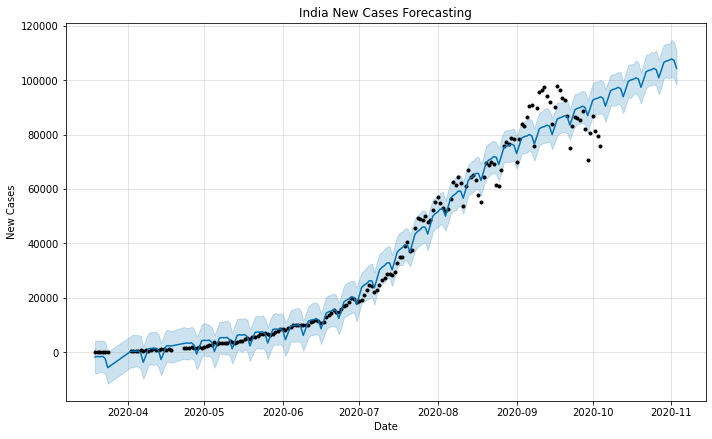

In [119]:
pp.plot(india_forecast_cases , xlabel='Date' , ylabel='New Cases')
plt.title('India New Cases Forecasting');